In [16]:
def add_gdp_categories(df):

    df['GDP category'] = 0

    for index, row in df.iterrows():

        if row['Sink OFC'] == 'Yes':
            df.loc[index, 'Sink OFC'] = 1
        else:
            df.loc[index, 'Sink OFC'] = 0

        if row['Conduit OFC'] == 'Yes':
            df.loc[index, 'Conduit OFC'] = 1
        else:
            df.loc[index, 'Conduit OFC'] = 0

        if (row['GDP per capita (PWT)'] >= 2.5) | (row['GDP per capita (World Bank)'] >= 2.5):
            df.loc[index, 'GDP category'] = 1
        elif (row['GDP per capita (PWT)'] >= 2.0) | (row['GDP per capita (World Bank)'] >= 2.0):
            df.loc[index, 'GDP category'] = 2
        elif (row['GDP per capita (PWT)'] >= 1.5) | (row['GDP per capita (World Bank)'] >= 1.5):
            df.loc[index, 'GDP category'] = 3
        elif (row['GDP per capita (PWT)'] >= 1.0) | (row['GDP per capita (World Bank)'] >= 1.0):
            df.loc[index, 'GDP category'] = 4
        elif (row['GDP per capita (PWT)'] >= 0.5) | (row['GDP per capita (World Bank)'] >= 0.5):
            df.loc[index, 'GDP category'] = 5
        elif (row['GDP per capita (PWT)'] >= 0.0) | (row['GDP per capita (World Bank)'] >= 0.0):
            df.loc[index, 'GDP category'] = 6
        elif (row['GDP per capita (PWT)'] >= -0.5) | (row['GDP per capita (World Bank)'] >= -0.5):
            df.loc[index, 'GDP category'] = 7
        elif (row['GDP per capita (PWT)'] >= -1.0) | (row['GDP per capita (World Bank)'] >= -1.0):
            df.loc[index, 'GDP category'] = 8
        elif (row['GDP per capita (PWT)'] >= -1.5) | (row['GDP per capita (World Bank)'] >= -1.5):
            df.loc[index, 'GDP category'] = 9
        elif (row['GDP per capita (PWT)'] >= -2.0) | (row['GDP per capita (World Bank)'] >= -2.0):
            df.loc[index, 'GDP category'] = 10
        elif (row['GDP per capita (PWT)'] >= -2.5) | (row['GDP per capita (World Bank)'] >= -2.5):
            df.loc[index, 'GDP category'] = 11
        elif (row['GDP per capita (PWT)'] < -2.5) | (row['GDP per capita (World Bank)'] < -2.5):
            df.loc[index, 'GDP category'] = 12
        
    return df
    

In [17]:
from sklearn.preprocessing import StandardScaler

def standard_scaler(df, col_range):
    x = df.iloc[:, col_range].values #returns a numpy array
    gdp_mean = df['GDP per capita (PWT)'].mean()
    gdp_std = df['GDP per capita (PWT)'].std()
    std_scaler = StandardScaler()
    std_scaler.fit(x)
    x_scaled = std_scaler.transform(x)
    df_scaled = df
    df_scaled.iloc[:, col_range] = x_scaled
    return [df_scaled, gdp_mean, gdp_std]

In [18]:
def get_subject_corr(subjects):
    correlations = {}

    for subject in subjects:

        df_rearranged, df_rearranged_mean = rearrange_db(df, 2017, 3, [subject])
        col_range_rearranged = [2,3] + list(range(9,26)) + list(range(27,45))
        df_rearranged, gdp_mean, gdp_std = standard_scaler(df_rearranged, col_range_rearranged)
        df_rearranged = add_gdp_categories(df_rearranged)

        correlations[subject] = {
            'PWT-RTAMS': df_rearranged.corr().loc['GDP per capita (PWT)', 'Documents / R-TAMS'],
            'WB-RTAMS': df_rearranged.corr().loc['GDP per capita (World Bank)', 'Documents / R-TAMS'],
            'PWT-MTAMS': df_rearranged.corr().loc['GDP per capita (PWT)', 'Documents / M-TAMS'],
            'WB-MTAMS': df_rearranged.corr().loc['GDP per capita (World Bank)', 'Documents / M-TAMS'],
        }

    return correlations

In [15]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

# pd.option_context('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')


df = pd.read_csv('../outputs/db.csv', index_col=0)

col_range = list(range(6,16)) + list(range(17,26)) + list(range(27,45))

# df_2017 = df.loc[((df['Year'] == 2012) & (df['Subject'] == 'All')), ['Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Documents', 'H index', 'Citations', 'Self-citations', 'Population', 'Citations per Document', 'Avg. Adult Schooling', 'MAX TAMS', 'REAL TAMS', 'Documents / M-TAMS', 'Documents / R-TAMS', 'Citations / M-TAMS', 'Citations / R-TAMS', 'Gov. Effectiveness']]


for i, column in enumerate(df.columns.values):
    print(f"{i} - {column}")

0 - Independent
1 - Sink OFC
2 - Conduit OFC
3 - Code
4 - Country
5 - Year
6 - Population
7 - Population 25 Years Before
8 - Population 25+
9 - Population 25+ / Population
10 - Documents
11 - Citable documents
12 - Citations
13 - Self-citations
14 - Citations per Document
15 - H index
16 - Subject
17 - Avg. Adult Schooling
18 - GDP per capita (World Bank)
19 - GDP per capita (PWT)
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)
34 - Pat

In [19]:
df.isna().sum()
# df.sample(3).T

Independent                                                                                             0
Sink OFC                                                                                                0
Conduit OFC                                                                                             0
Code                                                                                                    0
Country                                                                                                 0
Year                                                                                                    0
Population                                                                                              0
Population 25 Years Before                                                                              0
Population 25+                                                                                       4701
Population 25+ / Population                   

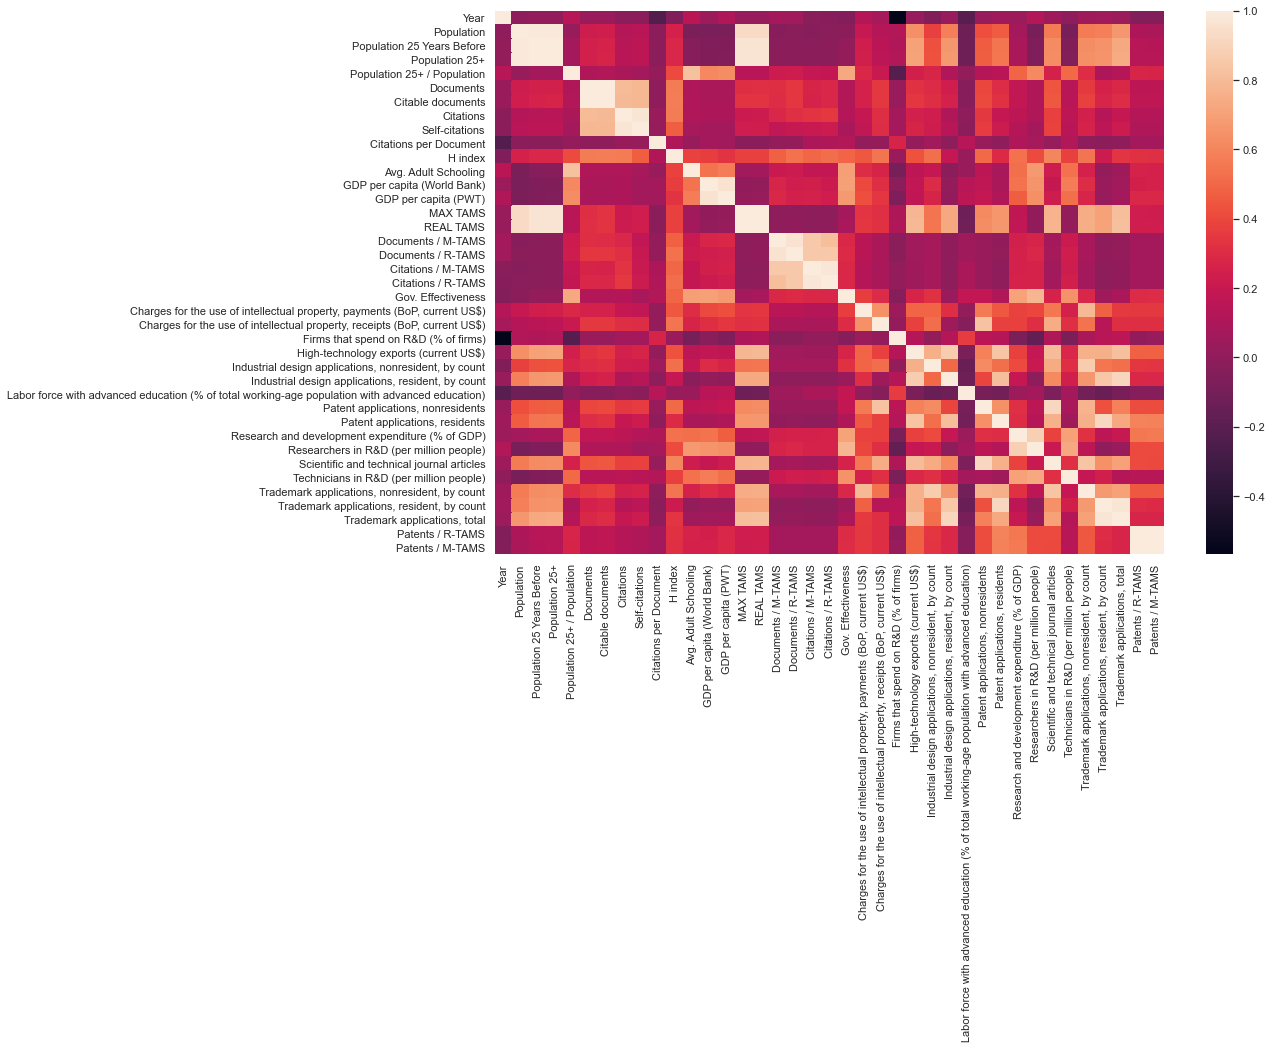

In [20]:
# display(df[(df.index == 780) & (df['Subject'] == 'All')].corr())

# display(df.corr())
plt.figure(figsize = (15,10))
sns.heatmap(df.corr())

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Fill NA values with mean value (also tested with median() and mode()[0])
df['Population 25+ / Population'][df['Population 25+ / Population'].isnull()] = df['Population 25+ / Population'].mean()

lr = LinearRegression()

to_train = ['Population 25+', 'Population', 'Population 25 Years Before', 'Population 25+ / Population']
temp_df = df[to_train]

#Split dataset with missing values and no missing values as test and train set respectively.
X_pop = temp_df[temp_df['Population 25+'].notnull()].drop(columns='Population 25+')
y_pop = temp_df[temp_df['Population 25+'].notnull()]['Population 25+']
X_pop_null = temp_df[temp_df['Population 25+'].isnull()].drop(columns='Population 25+')

X_train, X_test, y_train, y_test = train_test_split(X_pop, y_pop, test_size=0.2, random_state=1001)

#Fit a simple linear model to the dataset
lr.fit(X_train, y_train)
pred = lr.predict(X_pop_null)

#print fill values
print(np.round(pred, 5))

#Perform filling
df['Population 25+'][df['Population 25+'].isnull()] = pred
# df['Population 25+ / Population'] = df['Population 25+'] /  df['Population']

[-379.80566 -382.56934 -357.88218 ... -392.60161 -367.53638 -380.7252 ]


In [1882]:
# # explicitly require this experimental feature
# from sklearn.experimental import enable_iterative_imputer  
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# #get the index of missing so we can observe some of the values used for filling
# missing_indx = list(df['Avg. Adult Schooling'][df['Avg. Adult Schooling'].isna()].index)

# # Run the imputer with a simple Random Forest estimator
# imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)
# to_train = ['Avg. Adult Schooling', 'Population 25+ / Population', 'Gov. Effectiveness','Researchers in R&D (per million people)' ]

# #perform filling
# df[to_train] = pd.DataFrame(imp.fit_transform(df[to_train]), columns=to_train)

# #display some of the filled values
# df['Avg. Adult Schooling'][missing_indx]

In [22]:
df['REAL TAMS'] = df['Avg. Adult Schooling'] * df['Population 25+']
df['Documents / R-TAMS'] = df['Documents'] / df['REAL TAMS']
df['Citations / R-TAMS'] = df['Documents / R-TAMS'] * df['Citations per Document']

df.isna().sum()

Independent                                                                                             0
Sink OFC                                                                                                0
Conduit OFC                                                                                             0
Code                                                                                                    0
Country                                                                                                 0
Year                                                                                                    0
Population                                                                                              0
Population 25 Years Before                                                                              0
Population 25+                                                                                          0
Population 25+ / Population                   

In [23]:
def rearrange_db(df, year, step, subjects=['All']):

    years = sorted(df[df['Year'] <= year]['Year'].unique(), reverse=True)
    last_year = years[-1] + step
    df_rearranged = pd.DataFrame()
    df_rearranged_mean = pd.DataFrame()

    for year in years:

        if year >= last_year:
            
            df_economic = df.loc[((df['Year'] == year) & (df['Subject'].isin(subjects))), ['Year', 'Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Independent', 'Sink OFC', 'Conduit OFC','Code', 'Subject']]

            df_science = df.loc[((df['Year'] == (year - step)) & (df['Subject'].isin(subjects)))].drop(['Year','Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Independent', 'Sink OFC', 'Conduit OFC','Code', 'Subject'], axis=1)

            df_merged = df_economic.join(df_science, how='left')
            df_merged = df_merged[(df_merged['GDP per capita (World Bank)'].notna()) | (df_merged['GDP per capita (PWT)'].notna())]
            df_rearranged = df_rearranged.append(df_merged)

            if step > 0:
                df_science_cluster = pd.DataFrame()
                for i in range(0, step):
                    df_sci = df.loc[((df['Year'] == (year - (step - i))) & (df['Subject'].isin(subjects)))].drop(['Year','Country','GDP per capita (World Bank)', 'GDP per capita (PWT)'], axis=1)
                    df_science_cluster = df_science_cluster.append(df_sci)  
                df_science_mean = df_science_cluster.groupby(df_science_cluster.index).mean()

                ## Tentative relations between scientific production from current year and "step" years ago
                # df_science_today = df.loc[((df['Year'] == (year)) & (df['Subject'].isin(subjects)))].drop(['Year','Country','GDP per capita (World Bank)', 'GDP per capita (PWT)', 'Independent', 'Sink OFC', 'Conduit OFC','Code', 'Subject'], axis=1)
                # for index, row in df_science_mean.iterrows():
                #     if index in df_science_today.index:
                #         df_science_mean.loc[index, ['Documents / R-TAMS']] = (df_science_today.loc[index, ['Documents / R-TAMS']] + row['Documents / R-TAMS']) / 2
                #     else:
                #         df_science_mean.drop(index)

                df_merged_mean = df_economic.join(df_science_mean, how='left')
                df_merged_mean = df_merged_mean[(df_merged_mean['GDP per capita (World Bank)'].notna()) | (df_merged_mean['GDP per capita (PWT)'].notna())]
                df_rearranged_mean = df_rearranged_mean.append(df_merged_mean)

    return [df_rearranged, df_rearranged_mean]

subjects = ['All']
df_rearranged, df_rearranged_mean = rearrange_db(df, 2017, 3, subjects)
col_range_rearranged = [2,3] + list(range(9,26)) + list(range(27,45))
df_rearranged, gdp_mean, gdp_std = standard_scaler(df_rearranged, col_range_rearranged)
df_rearranged = add_gdp_categories(df_rearranged)


# df_rearranged.sort_values(by='GDP per capita (PWT)', inplace=True, ascending=False)
print (list(set(df['Subject'].values)))
df_rearranged.corr().loc['GDP per capita (PWT)', 'Documents / R-TAMS']

['Environmental Science', 'Pharmacology, Toxicology and Pharmaceutics', 'All', 'Arts and Humanities', 'Agricultural and Biological Sciences', 'Physics and Astronomy', 'Biochemistry, Genetics and Molecular Biology', 'Decision Sciences', 'Mathematics', 'Chemistry', 'Nursing', 'Medicine', 'Social Sciences', 'Business, Management and Accounting', 'Multidisciplinary', 'Dentistry', 'Chemical Engineering', 'Computer Science', 'Materials Science', 'Economics, Econometrics and Finance', 'Health Professions', 'Earth and Planetary Sciences', 'Engineering', 'Psychology', 'Neuroscience', 'Veterinary', 'Energy', 'Immunology and Microbiology']


0.6547958630533378

In [1888]:
# df_rearranged[df_rearranged['Sink OFC'] == 1]['GDP category'].value_counts()

df_rearranged_mean.corr()
df_rearranged_mean, gdp_mean, gdp_std = standard_scaler(df_rearranged_mean, col_range_rearranged)
df_rearranged_mean = add_gdp_categories(df_rearranged_mean)
for i, column in enumerate(df_rearranged_mean.columns.values):
    print(f"{i} - {column}")

df_rearranged_mean

0 - Year
1 - Country
2 - GDP per capita (World Bank)
3 - GDP per capita (PWT)
4 - Independent
5 - Sink OFC
6 - Conduit OFC
7 - Code
8 - Subject
9 - Population
10 - Population 25 Years Before
11 - Population 25+
12 - Population 25+ / Population
13 - Documents
14 - Citable documents
15 - Citations
16 - Self-citations
17 - Citations per Document
18 - H index
19 - Avg. Adult Schooling
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)
34 - Pat

,Year,Country,GDP per capita (World Bank),GDP per capita (PWT),Independent,Sink OFC,Conduit OFC,Code,Subject,Population,Population 25 Years Before,Population 25+,Population 25+ / Population,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total",Patents / R-TAMS,Patents / M-TAMS,GDP category
Country code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2017,Afghanistan,-0.777799,NaN,Yes,0,0,AFG,All,-0.000995,-0.119605,-0.092983,-1.346833,-0.241585,-0.246986,-0.206254,-0.146669,3.227219,-0.608494,-1.283713,-0.218217,-0.201179,-0.586882,-0.615499,-0.462724,-0.474498,-1.293576,-0.280030,-0.176454,-0.010985,NaN,NaN,NaN,0.666525,NaN,NaN,NaN,NaN,-0.242168,NaN,NaN,NaN,NaN,NaN,NaN,8
8,2017,Albania,-0.253190,-0.228727,Yes,0,0,ALB,All,-0.239401,-0.218426,-0.222453,0.920638,-0.233800,-0.238619,-0.208824,-0.146443,-1.197054,-0.570968,0.697037,-0.236950,-0.244145,-0.446649,-0.371392,-0.481183,-0.468195,-0.020665,-0.275208,-0.176235,NaN,-0.281625,-0.187585,-0.169121,-0.745114,-0.241887,-0.188926,NaN,NaN,-0.238477,NaN,-0.319773,-0.239738,-0.224518,-0.337559,-0.334054,8
12,2017,Algeria,-0.142470,-0.209815,Yes,0,0,DZA,All,0.039462,0.021688,0.038929,0.213079,-0.116533,-0.112551,-0.179797,-0.128716,-1.200765,-0.239489,0.103871,0.019009,0.036847,-0.288028,-0.291072,-0.443766,-0.449035,-0.503198,-0.241972,-0.176337,NaN,-0.281732,-0.437749,-0.148729,NaN,-0.212147,-0.187429,NaN,NaN,-0.131362,NaN,-0.020638,-0.141113,-0.172344,-0.343181,-0.333616,7
24,2017,Angola,-0.567130,-0.572345,Yes,0,0,AGO,All,-0.050190,-0.126826,-0.123558,-1.377310,-0.241845,-0.247071,-0.210013,-0.146664,-0.551267,-0.642892,-0.828246,-0.196552,-0.191801,-0.596430,-0.621261,-0.508901,-0.515384,-1.053225,-0.229236,-0.174221,NaN,-0.279457,NaN,NaN,NaN,NaN,NaN,-0.909069,-0.924025,-0.242472,-0.785372,-0.593163,-0.234000,-0.219472,NaN,NaN,8
660,2017,Anguilla,NaN,-0.132988,No,1,0,AIA,All,-0.261175,-0.253309,-0.251998,0.201733,-0.243859,-0.249132,-0.210107,-0.146828,5.364995,-0.708563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.096150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1999,Venezuela (Bolivarian Republic of),-0.129216,-0.499355,Yes,0,0,VEN,All,-0.088430,-0.124173,-0.110515,-0.488873,-0.219143,-0.222018,-0.194856,-0.141820,-0.298361,-0.105022,-0.563440,-0.179711,-0.167021,-0.430229,-0.447009,-0.405454,-0.411359,-0.664175,-0.263205,-0.176476,NaN,NaN,NaN,NaN,NaN,-0.149069,-0.185685,NaN,-0.907231,NaN,NaN,NaN,NaN,-0.031356,-0.281227,-0.269917,7
704,1999,Viet Nam,-0.745151,-0.721597,Yes,0,0,VNM,All,0.322323,0.233068,0.221595,-0.427642,-0.237457,-0.242079,-0.206711,-0.145117,-0.212998,-0.108149,-0.849431,0.049398,0.043093,-0.601100,-0.626413,-0.509443,-0.515836,-0.481744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.193567,-0.188633,NaN,NaN,NaN,NaN,NaN,NaN,-0.183396,-0.351950,-0.342769,8
887,1999,Yemen,-0.674554,-0.766465,Yes,0,0,YEM,All,-0.140445,-0.185110

In [24]:
display(df_rearranged)

for i, column in enumerate(df_rearranged.columns.values):
    print(f"{i} - {column}")

,Year,Country,GDP per capita (World Bank),GDP per capita (PWT),Independent,Sink OFC,Conduit OFC,Code,Subject,Population,Population 25 Years Before,Population 25+,Population 25+ / Population,Documents,Citable documents,Citations,Self-citations,Citations per Document,H index,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)","Charges for the use of intellectual property, receipts (BoP, current US$)",Firms that spend on R&D (% of firms),High-technology exports (current US$),"Industrial design applications, nonresident, by count","Industrial design applications, resident, by count",Labor force with advanced education (% of total working-age population with advanced education),"Patent applications, nonresidents","Patent applications, residents",Research and development expenditure (% of GDP),Researchers in R&D (per million people),Scientific and technical journal articles,Technicians in R&D (per million people),"Trademark applications, nonresident, by count","Trademark applications, resident, by count","Trademark applications, total",Patents / R-TAMS,Patents / M-TAMS,GDP category
Country code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,2017,Afghanistan,-0.777799,NaN,Yes,0,0,AFG,All,-0.007339,-0.125711,-0.097749,-1.355303,-0.238451,-0.243935,-0.202983,-0.144759,3.350623,-0.612653,-1.283119,-0.224734,-0.206994,-0.588325,-0.615749,-0.448224,-0.461469,-1.331396,-0.288592,-0.179035,-0.081122,NaN,NaN,NaN,0.675661,NaN,NaN,NaN,NaN,-0.242821,NaN,NaN,NaN,NaN,NaN,NaN,8
8,2017,Albania,-0.253190,-0.228727,Yes,0,0,ALB,All,-0.239510,-0.219075,-0.223142,0.878977,-0.228932,-0.233667,-0.206716,-0.144604,-1.227087,-0.575192,0.687342,-0.239795,-0.247006,-0.419851,-0.325449,-0.484808,-0.474952,-0.085558,-0.283749,-0.178998,NaN,-0.292714,-0.223994,-0.183297,-0.831756,-0.257783,-0.206259,NaN,NaN,-0.238824,NaN,-0.357568,-0.27167,-0.243678,-0.361281,-0.355170,8
12,2017,Algeria,-0.142470,-0.209815,Yes,0,0,DZA,All,0.034965,0.017813,0.034600,0.210488,-0.124161,-0.121033,-0.179055,-0.126730,-1.052344,-0.244285,0.115273,0.012866,0.030206,-0.309296,-0.313954,-0.442952,-0.448349,-0.477553,-0.256585,-0.179044,NaN,-0.292677,-0.458097,-0.163578,NaN,-0.225808,-0.204653,NaN,NaN,-0.144166,NaN,NaN,NaN,-0.170526,-0.361300,-0.351069,7
24,2017,Angola,-0.567130,-0.572345,Yes,0,0,AGO,All,-0.056319,-0.130201,-0.127008,-1.363722,-0.238604,-0.243814,-0.208218,-0.144796,-1.088152,-0.646993,-0.838176,-0.202629,-0.197762,-0.597841,-0.620712,-0.511918,-0.518837,-1.123669,-0.232371,-0.176134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.242854,NaN,NaN,NaN,NaN,NaN,NaN,8
660,2017,Anguilla,NaN,-0.132988,No,1,0,AIA,All,-0.261468,-0.254305,-0.252824,0.228098,-0.240726,-0.246037,-0.208655,-0.144995,-0.287482,-0.712550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.952229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1999,Venezuela (Bolivarian Republic of),-0.129216,-0.499355,Yes,0,0,VEN,All,-0.091030,-0.127044,-0.113191,-0.496884,-0.217794,-0.220983,-0.195413,-0.140624,-0.376286,-0.110049,-0.583923,-0.186228,-0.173385,-0.437567,-0.454423,-0.418586,-0.425093,-0.540713,-0.288171,-0.179098,NaN,NaN,NaN,NaN,NaN,-0.176549,-0.202972,NaN,NaN,NaN,NaN,NaN,NaN,-0.036251,-0.304582,-0.292631,7
704,1999,Viet Nam,-0.745151,-0.721597,Yes,0,0,VNM,All,0.317956,0.227915,0.213842,-0.460878,-0.234424,-0.239176,-0.204357,-0.143383,-0.161438,-0.113171,-0.869958,0.035876,0.028216,-0.603426,-0.626820,-0.506547,-0.512784,-0.580876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.216429,-0.205743,NaN,NaN,NaN,NaN,NaN,NaN,-0.191069,-0.368689,-0.358898,8
887,1999,Yemen,-0.674554,-0.766465,Yes,0,0,YEM,All,-0.143723,-0.186196,-0.182467,-1.515173,-0.240157,-0.245409,-0.208367,-0.144853

0 - Year
1 - Country
2 - GDP per capita (World Bank)
3 - GDP per capita (PWT)
4 - Independent
5 - Sink OFC
6 - Conduit OFC
7 - Code
8 - Subject
9 - Population
10 - Population 25 Years Before
11 - Population 25+
12 - Population 25+ / Population
13 - Documents
14 - Citable documents
15 - Citations
16 - Self-citations
17 - Citations per Document
18 - H index
19 - Avg. Adult Schooling
20 - MAX TAMS
21 - REAL TAMS
22 - Documents / M-TAMS
23 - Documents / R-TAMS
24 - Citations / M-TAMS
25 - Citations / R-TAMS
26 - Gov. Effectiveness
27 - Charges for the use of intellectual property, payments (BoP, current US$)
28 - Charges for the use of intellectual property, receipts (BoP, current US$)
29 - Firms that spend on R&D (% of firms)
30 - High-technology exports (current US$)
31 - Industrial design applications, nonresident, by count
32 - Industrial design applications, resident, by count
33 - Labor force with advanced education (% of total working-age population with advanced education)
34 - Pat

In [25]:
col_range = list(range(19,28)) + [0, 2, 3, 5, 6, 9, 12, 45]

# df_saturated = df[(df['Subject'] == 'All') & (df['Year'] <= 2017) & (df['Year'] >= 2000) & (df['Sink OFC'] != 'Yes')].iloc[:, col_range].dropna()

## Uncomment just one of the below
# df_saturated = df_rearranged.iloc[:, col_range].dropna()
df_saturated = df_rearranged[(df_rearranged['Sink OFC'] != 1)].iloc[:, col_range].dropna()
# df_saturated = df_rearranged_mean[(df_rearranged_mean['Sink OFC'] != 1)].iloc[:, col_range].dropna()
# df_saturated = df_rearranged_mean.iloc[:, col_range].dropna()

# df_saturated = df_saturated[(df_saturated.iloc[:, 1:] <= 2.5) & (df_saturated.iloc[:, 1:] >= -2.5)]
df_saturated = df_saturated[(df_saturated['GDP per capita (PWT)'] <= 2.5) & (df_saturated['GDP per capita (PWT)'] >= -2.5)]

# df_saturated = df_saturated.groupby(by=[df_saturated.index, 'Year']).mean()


df_saturated

,Avg. Adult Schooling,MAX TAMS,REAL TAMS,Documents / M-TAMS,Documents / R-TAMS,Citations / M-TAMS,Citations / R-TAMS,Gov. Effectiveness,"Charges for the use of intellectual property, payments (BoP, current US$)",Year,GDP per capita (World Bank),GDP per capita (PWT),Sink OFC,Conduit OFC,Population,Population 25+ / Population,GDP category
Country code,,,,,,,,,,,,,,,,,
8,0.687342,-0.239795,-0.247006,-0.419851,-0.325449,-0.484808,-0.474952,-0.085558,-0.283749,2017,-0.253190,-0.228727,0,0,-0.239510,0.878977,8
12,0.115273,0.012866,0.030206,-0.309296,-0.313954,-0.442952,-0.448349,-0.477553,-0.256585,2017,-0.142470,-0.209815,0,0,0.034965,0.210488,7
24,-0.838176,-0.202629,-0.197762,-0.597841,-0.620712,-0.511918,-0.518837,-1.123669,-0.232371,2017,-0.567130,-0.572345,0,0,-0.056319,-1.363722,8
32,0.719124,0.189725,0.172079,-0.124693,-0.069174,-0.326148,-0.310810,-0.159135,0.178289,2017,0.120903,-0.004893,0,0,0.063259,0.508787,7
51,1.259411,-0.226055,-0.239468,-0.307579,-0.121846,-0.365991,-0.280939,-0.198051,-0.288616,2017,-0.411413,-0.315724,0,0,-0.239387,1.026004,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,-1.283119,-0.236386,-0.236939,-0.570706,-0.581274,-0.481053,-0.479026,-0.687850,-0.288616,1999,-0.817288,-0.763714,0,0,-0.101337,-1.519883,8
826,1.227630,0.675359,0.559557,1.036058,1.448782,1.226395,1.594954,1.882196,1.117292,1999,0.817163,0.653378,0,1,0.181164,1.264688,5
840,1.640791,3.780334,3.789678,0.925857,1.057965,1.408705,1.515523,1.524920,1.454664,1999,1.471251,1.381582,0,0,1.782741,0.967040,4


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, mean_squared_error, make_scorer,  median_absolute_error, explained_variance_score, mean_gamma_deviance
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
from sklearn.preprocessing import  OneHotEncoder
from sklearn.preprocessing import StandardScaler

hot_enc = OneHotEncoder(sparse=False)

df_test = df_saturated[['GDP per capita (PWT)', 'Documents / R-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness', 'Sink OFC', 'Conduit OFC', 'GDP category']]

X = df_test.iloc[:, 1:-1]
y = df_test.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001, stratify=df_test.iloc[:, -1])



lr = LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [27]:
lr.score(X_test, y_test)

0.8714021364772175

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe = make_pipeline(lr)
scorer = make_scorer(mean_squared_error)

y_pred = pipe.predict(X_test)

cv_scores = cross_val_score(pipe, X, y, cv=10, scoring=scorer)

cv_scores.mean()
y_pred

array([-5.12226033e-01, -3.60536854e-01, -3.37718807e-01, -3.61744630e-01,
       -5.57569421e-01, -4.83209436e-01, -4.63236211e-02,  5.75969975e-02,
       -6.31451298e-02, -3.92603252e-01, -5.62812591e-01, -6.94738254e-01,
       -5.04449595e-01, -1.98038162e-01, -2.83059835e-01, -8.25169923e-02,
       -5.01075760e-01, -2.30014476e-01, -4.13756818e-01, -4.64871612e-01,
        1.37934735e+00, -6.95791632e-01, -1.02745038e-01,  4.07835246e-01,
        1.13393428e+00, -1.45211208e-01, -6.01190838e-01,  4.08900642e-01,
       -4.50478468e-01, -9.68482219e-02, -4.73454761e-01, -4.87161698e-01,
       -5.66317861e-01, -6.92899563e-01, -6.56413592e-02,  7.78875991e-01,
       -5.70671458e-01, -5.12839385e-02, -6.08507819e-01, -3.99027209e-01,
       -2.49158825e-01, -4.66488637e-01, -2.13352284e-01, -4.36815526e-01,
       -4.79702493e-01, -4.96643675e-01, -2.04912948e-01, -4.04529922e-01,
       -4.71551776e-01, -4.87229511e-01,  9.34233298e-01, -6.70033151e-01,
       -4.84457405e-01,  

In [30]:
cv_scores.std()

0.01254041960483339

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder


df_1 = df_saturated[['GDP per capita (PWT)', 'Documents / R-TAMS', 'Charges for the use of intellectual property, payments (BoP, current US$)', 'Gov. Effectiveness', 'Avg. Adult Schooling', 'Population 25+ / Population', 'Sink OFC', 'Conduit OFC', 'GDP category']]

X = df_1.iloc[:, 1:-1]
y = df_1.iloc[:, 0]

# scaler = StandardScaler()
# scaler.fit(X)
# X_scaled = scaler.transform(X)

# col_transf = make_column_transformer((OneHotEncoder(), ['sex','embarked']),
#                                      remainder='passthrough')
# hot_enc = OneHotEncoder(sparse=False)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001, stratify=df_test.iloc[:, -1])


# pipeline de predição: features polinomiais + regressão linear
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])

pipeline.fit(X_train, y_train)
        
# Avalia o modelo com crossvalidation
scores = cross_val_score(pipeline, X_test, y_test,
scoring="neg_mean_absolute_error", cv=10)

pipeline.score(X_test, y_test)

0.912514905553486

In [33]:
print(scores.mean())
print(scores.mean() * gdp_std)

-0.13889129841989728
-2808.5495378974556


In [34]:
# df_rearranged[(df_rearranged.index == 840) & (df_rearranged['Gov. Effectiveness'] > 1.46)]

In [35]:
y_pred = pipeline.predict(X_test)
# y_transform = df_rearranged_mean + (y_pred * df_rearranged_std)
# y_transform
y_pred
df_y_pred = pd.DataFrame(y_pred)
df_y_pred
teste = X_test.reset_index()
teste
df_y_pred = df_y_pred[df_y_pred >= 1.5]
y_errors = df_y_pred.dropna()
teste_errors = teste[teste.index.isin(y_errors.index)]
teste_errors


,Country code,Documents / R-TAMS,"Charges for the use of intellectual property, payments (BoP, current US$)",Gov. Effectiveness,Avg. Adult Schooling,Population 25+ / Population,Sink OFC,Conduit OFC
101,840,1.354498,4.787071,1.761568,1.672573,1.003204,0,0
102,702,3.137631,1.893636,2.375459,0.846250,1.378403,0,1
111,840,1.503060,5.887271,1.613998,1.799699,1.039352,0,0
146,756,4.810276,2.265339,1.891962,1.863262,1.648084,0,1
169,702,3.726371,4.851043,2.166091,1.195848,1.567635,0,1
209,528,3.083587,7.011933,1.729366,1.418320,1.421315,0,1
215,702,3.467245,4.237228,2.154786,1.164067,1.541086,0,1
221,840,1.546119,5.186800,1.649809,1.704354,1.026308,0,0
230,840,1.719670,7.032404,1.519567,1.831481,1.082981,0,0
316,840,1.815569,8.066760,1.467586,1.831481,1.145321,0,0


In [36]:
all_y_pred = pipeline.predict(X)
# y_transform = df_rearranged_mean + (y_pred * df_rearranged_std)
# y_transform
all_y_pred
df_1['Residue'] = df_1['GDP per capita (PWT)'] - all_y_pred
error_countries = df_1[(df_1['Residue'] > 0.25) | (df_1['Residue'] < -0.25)].index.unique()
df_1[(df_1['Residue'] > 0.5) | (df_1['Residue'] < -0.5)]
# df[(df.index.isin(error_countries)) & (df['Year'] <= 2017) & ((df['Population 25+ / Population'] >= 1.0) | (df['Population 25+ / Population'] <= 0.5)) ]

,GDP per capita (PWT),Documents / R-TAMS,"Charges for the use of intellectual property, payments (BoP, current US$)",Gov. Effectiveness,Avg. Adult Schooling,Population 25+ / Population,Sink OFC,Conduit OFC,GDP category,Residue
Country code,,,,,,,,,,
578,2.177471,4.218052,-0.143102,1.828457,1.577228,1.309898,0,0,2,0.940962
659,0.132030,-1.040260,-0.287940,-0.071792,0.274181,0.228098,0,0,7,0.637058
780,1.148180,-0.112565,-0.273009,0.272078,1.036940,1.048104,0,0,6,1.181901
398,0.215832,-0.478669,-0.255718,-0.532778,1.291193,0.476949,0,0,7,0.507061
578,2.130786,4.017626,-0.139991,1.884967,1.640791,1.289645,0,0,2,0.904453
780,1.237132,-0.256802,-0.275089,0.362185,1.036940,1.006974,0,0,6,1.295405
398,0.241368,-0.565255,-0.254717,-0.440245,1.259411,0.446785,0,0,7,0.559906
578,2.288832,3.953789,-0.157874,1.909127,1.609009,1.274346,0,0,2,1.059789
780,1.359248,-0.197162,-0.276585,0.410598,1.036940,0.961067,0,0,6,1.391291


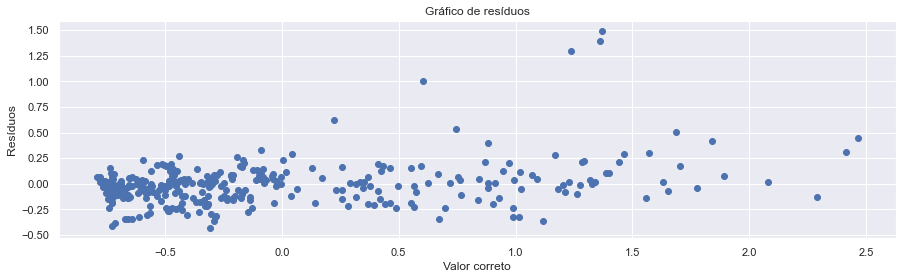

In [37]:
# Gráfico de resíduos (diferença entre a predição e o valor verdadeiro esperado)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.scatter(y_test,y_test-y_pred)
plt.title("Gráfico de resíduos")
plt.xlabel("Valor correto")
plt.ylabel("Resíduos")
plt.show()

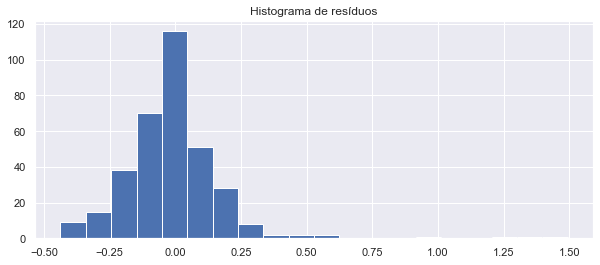

In [38]:
plt.figure(figsize=(10,4))
plt.hist(y_test-y_pred, bins= 20)
plt.title("Histograma de resíduos")
plt.show()

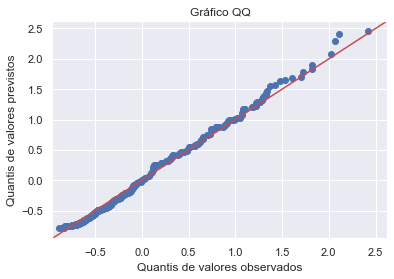

In [40]:
## Gráfico QQ
from statsmodels.graphics.gofplots import qqplot_2samples

qqplot_2samples(y_test,y_pred,line='45')
plt.title("Gráfico QQ")
plt.xlabel("Quantis de valores observados")
plt.ylabel("Quantis de valores previstos")
plt.show()